In [2]:
#데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 사이킷런: 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 사이킷런: 모델 선택 및 평가
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# 사이킷런: 대표 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 부스팅 계열 모델
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 기타 (필요 시)
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
import matplotlib.pyplot as plt
import seaborn as sns

찾은 나눔 폰트:
  C:\Windows\Fonts\NanumSquareR.ttf
  C:\Windows\Fonts\NanumBarunpenR.ttf


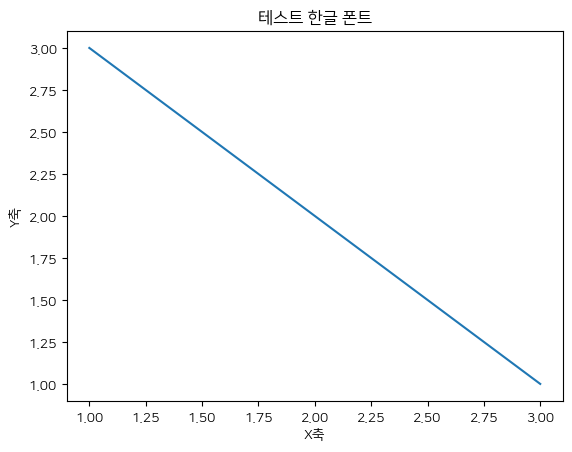

In [3]:
import matplotlib.font_manager as fm

paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
nanum_fonts = [p for p in paths if 'Nanum' in p]  # 'NanumGothic' 대신 'Nanum' 으로 검색
print("찾은 나눔 폰트:")
for p in nanum_fonts:
    print(" ", p)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 이 줄 추가!

# 1) 경로 지정 (공백 삭제)
nanum_path = r"C:/Windows/Fonts/NanumSquareR.ttf"

# 2) 폰트 등록
fm.fontManager.addfont(nanum_path)

# 3) 실제 폰트 이름 추출
prop = FontProperties(fname=nanum_path)
font_name = prop.get_name()

# 4) rcParams에 반영
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 5) 테스트 플롯
plt.plot([1,2,3], [3,2,1])
plt.title("테스트 한글 폰트")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()

In [4]:
fatigue_df = pd.read_csv(r'C:/Users/user/OneDrive/Desktop/최강이세용/최종.csv', encoding = 'cp949')

In [5]:
fatigue_df.isnull().sum()

선수              0
연도              0
팀               0
보직              0
나이              0
             ... 
휴식대연투비율       163
연투횟수_roll3    489
연투일수_roll3    489
휴식_inv        163
피로도지수           0
Length: 76, dtype: int64

In [6]:
# 1. 구속_변화량 컬럼 제거
fatigue_df.drop(columns=['구속_변화량'], inplace=True)

# 2. 부상위험도 결측값 0으로 채우기
fatigue_df['부상위험도'] = fatigue_df['부상위험도'].fillna(0)

## 신체 기량 PCA

## 주성분 1개 설명력 : 59.59%

## GPT 피셜 그래도 SHAP해라

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 1. 사용할 기량 변수
skill_features = ['ERA', 'WHIP', '직구_피안타율']

# 2. 결측치 제거
X_skill = fatigue_df[skill_features].dropna()

# 3. 상수항 추가
X_skill_const = add_constant(X_skill)

# 4. VIF 계산
vif_skill = pd.DataFrame()
vif_skill['변수'] = X_skill_const.columns
vif_skill['VIF'] = [variance_inflation_factor(X_skill_const.values, i) for i in range(X_skill_const.shape[1])]

display(vif_skill)

,변수,VIF
0,const,19.260083
1,ERA,2.489450
2,WHIP,2.494524
3,직구_피안타율,1.005557


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 선수 기량 변수
skill_vars = ['ERA', 'WHIP', '직구_피안타율']
X_skill = fatigue_df[skill_vars].dropna()

# 2. 표준화 (PCA 전에 꼭 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_skill)

# 3. PCA 주성분 1개 추출
pca = PCA(n_components=1)
PC1 = pca.fit_transform(X_scaled)

# 4. 결과 추가
fatigue_df.loc[X_skill.index, '기량_PC1'] = PC1[:, 0]

In [9]:
print(f"기량_PC1 설명력: {pca.explained_variance_ratio_[0]:.2%}")

기량_PC1 설명력: 59.49%


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 사용할 기량 변수
skill_vars = ['ERA', 'WHIP', '직구_피안타율']
X_skill = fatigue_df[skill_vars].dropna()

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_skill)

# 3. PCA (2개 주성분)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 결과 저장
fatigue_df.loc[X_skill.index, '기량_PC1'] = X_pca[:, 0]
fatigue_df.loc[X_skill.index, '기량_PC2'] = X_pca[:, 1]

# 5. 설명력 출력
print(f"PC1 설명력: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 설명력: {pca.explained_variance_ratio_[1]:.2%}")
print(f"총 설명력: {pca.explained_variance_ratio_.sum():.2%}")

PC1 설명력: 59.49%
PC2 설명력: 32.96%
총 설명력: 92.46%


# Z-score

In [11]:
#%pip install shap

In [12]:
# Venue_bin: Home = 1, Away = 0
fatigue_df['구장'] = fatigue_df['구장'].map({'Home': 1, 'Away': 0})

In [ ]:
env_vars = ['누적이동거리', '온도', '구장']

from sklearn.preprocessing import StandardScaler

# z-score 변환
scaler = StandardScaler()
env_z = scaler.fit_transform(fatigue_df[env_vars])

# 표준화된 결과 저장
env_z_df = pd.DataFrame(env_z, columns=[f"{col}_z" for col in env_vars])
fatigue_df = pd.concat([fatigue_df.reset_index(drop=True), env_z_df], axis=1)

# 평균 기반 환경지수 생성
fatigue_df['환경지수_z'] = env_z_df.mean(axis=1)

In [14]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import shap

# 타깃 및 피처 설정
target = 'GS_변화량'
env_z_cols = [f"{col}_z" for col in env_vars]

X_env = fatigue_df[env_z_cols]
y_env = fatigue_df[target]

X_train, X_test, y_train, y_test = train_test_split(X_env, y_env, test_size=0.2, random_state=42)

# 모델 학습
model_env = CatBoostRegressor(verbose=0, random_state=42)
model_env.fit(X_train, y_train)

In [15]:
explainer = shap.Explainer(model_env)
shap_values = explainer(X_train)

# 평균 절댓값 기준 SHAP 중요도
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 결과 정리
env_importance_df = pd.DataFrame({
    '변수': env_z_cols,
    'SHAP_중요도': shap_importance
})
env_importance_df['가중치'] = env_importance_df['SHAP_중요도'] / env_importance_df['SHAP_중요도'].sum()

display(env_importance_df)

,변수,SHAP_중요도,가중치
0,누적이동거리_z,0.502381,0.436015
1,온도_z,0.457726,0.397259
2,구장_z,0.192103,0.166726


In [ ]:
fatigue_df['외부환경변수'] = (
    0.433886 * fatigue_df['온도_z'] +
    0.420906 * fatigue_df['누적이동거리_z'] +
    0.145208 * fatigue_df['구장_z'] 
)

In [17]:
from sklearn.preprocessing import StandardScaler

skill_vars = ['ERA', 'WHIP', '직구_피안타율']

# 표준화 실행
scaler = StandardScaler()
skill_z = scaler.fit_transform(fatigue_df[skill_vars])

# z-score 결과를 붙이기
skill_z_df = pd.DataFrame(skill_z, columns=[f"{col}_z" for col in skill_vars])
fatigue_df = pd.concat([fatigue_df.reset_index(drop=True), skill_z_df], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import shap

# 1. 타깃 & 피처 설정
target = 'GS_변화량'  # 예시 타깃
skill_cols = ['ERA_z', 'WHIP_z', '직구_피안타율_z']

X = fatigue_df[skill_cols]
y = fatigue_df[target]

# 2. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. CatBoost 회귀 모델 학습
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train)

In [19]:
import shap
import numpy as np
import pandas as pd

# 1. SHAP explainer 생성 및 값 계산
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# 2. 변수별 SHAP 중요도 = 평균 절댓값
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 3. 중요도 정리
importance_df = pd.DataFrame({
    '변수': X_train.columns,
    'SHAP_중요도': shap_importance
})
importance_df['가중치'] = importance_df['SHAP_중요도'] / importance_df['SHAP_중요도'].sum()

# 결과 확인
display(importance_df)

,변수,SHAP_중요도,가중치
0,ERA_z,1.738418,0.360878
1,WHIP_z,2.559566,0.531339
2,직구_피안타율_z,0.519212,0.107783


In [20]:
# SHAP 기반 기량지수 계산
fatigue_df['선수기량변수'] = (
    0.341328 * fatigue_df['ERA_z'] +
    0.546622 * fatigue_df['WHIP_z'] +
    0.112050 * fatigue_df['직구_피안타율_z']
)

In [21]:
fatigue_df

,선수,연도,팀,보직,나이,키,몸무게,날짜,구장,온도,...,기량_PC2,누적이동거리_z,온도_z,구장_z,환경지수_z,외부환경변수,ERA_z,WHIP_z,직구_피안타율_z,선수기량변수
0,고영표,2021,KT,SP,34,187,88,2021-04-07,1,16.7,...,-0.284199,-1.618438,-1.551384,0.973536,-0.732095,-1.212969,-0.305372,-0.433944,-0.347834,-0.380410
1,고영표,2021,KT,SP,34,187,88,2021-04-13,0,10.2,...,-0.319511,-1.410199,-2.805346,-1.027184,-1.747576,-1.959917,-0.069172,-0.258839,-0.347834,-0.204072
2,고영표,2021,KT,SP,34,187,88,2021-04-18,1,13.2,...,-0.295334,-1.398874,-2.226594,0.973536,-0.883977,-1.413517,-0.187272,-0.433944,-0.347834,-0.340099
3,고영표,2021,KT,SP,34,187,88,2021-04-24,1,22.8,...,-0.344831,-1.157755,-0.374588,0.973536,-0.186269,-0.508470,-0.069172,0.081070,-0.347834,-0.018271
4,고영표,2021,KT,SP,34,187,88,2021-04-30,1,12.0,...,-0.313610,-1.129259,-2.458095,0.973536,-0.871273,-1.400480,-0.119561,-0.274290,-0.347834,-0.229717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,후라도,2024,키움,SP,29,188,109,2024-08-25,1,25.5,...,0.289348,0.761331,0.146288,0.973536,0.627052,0.525287,-0.221127,-0.639949,0.222443,-0.400362
17524,후라도,2024,키움,SP,29,188,109,2024-09-03,0,28.0,...,0.207902,0.893947,0.628581,-1.027184,0.165115,0.499845,0.032394,0.132571,0.222443,0.108448
17525,후라도,2024,키움,SP,29,188,109,2024-09-08,0,32.0,...,0.261160,0.969570,1.400251,-1.027184,0.447546,0.866492,-0.133733,-0.372142,0.222443,-0.224143
17526,후라도,2024,키움,SP,29,188,109,2024-09-14,0,33.4,...,0.276983,1.196076,1.670335,-1.027184,0.613076,1.079015,-0.321906,-0.346391,0.222443,-0.274296


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 정규화
features = ['나이', '키', '몸무게', '부상위험도']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fatigue_df[features])

# PCA 수행
pca = PCA(n_components=1)
fatigue_df['신체조건지수'] = pca.fit_transform(X_scaled)


In [23]:
print("각 변수의 기여도 (주성분 계수):", pca.components_[0])
print("설명된 분산 비율:", pca.explained_variance_ratio_[0])

각 변수의 기여도 (주성분 계수): [-0.26593474  0.6864537   0.67141944 -0.08518194]
설명된 분산 비율: 0.36281808734464477


In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 각각 컬럼에 저장
fatigue_df['신체조건_PC1'] = pca_result[:, 0]
fatigue_df['신체조건_PC2'] = pca_result[:, 1]

# 설명력 확인
print("PC1 분산 설명 비율:", pca.explained_variance_ratio_[0])
print("PC2 분산 설명 비율:", pca.explained_variance_ratio_[1])


PC1 분산 설명 비율: 0.36281808734464477
PC2 분산 설명 비율: 0.25609958785344955


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# 스케일링
features = ['나이', '키', '몸무게', '부상위험도']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fatigue_df[features])

# 요인분석 (1개의 요인 추출)
fa = FactorAnalysis(n_components=1, random_state=42)
fatigue_df['신체조건변수'] = fa.fit_transform(X_scaled)

print("요인 로딩값:", fa.components_[0])

요인 로딩값: [-0.11598513  0.8479863   0.4883879  -0.07317411]


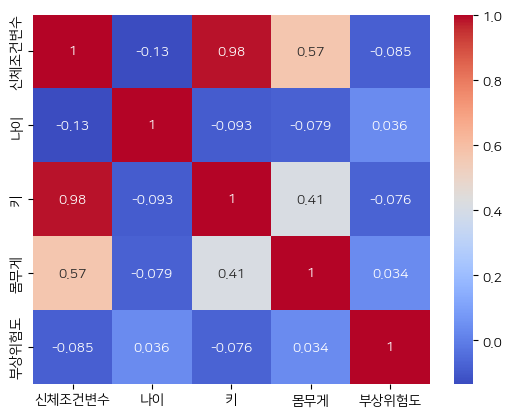

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fatigue_df[['신체조건변수', '나이', '키', '몸무게', '부상위험도']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
# 1연투 : 1, 2연투 : 1+2, 3연투 : 1+2+3, 4연투 : 1+2+3+4
fatigue_df['누적연투일수'] = fatigue_df['연투일수'] * (fatigue_df['연투일수'] + 1) // 2

,신체조건변수,누적연투일수,투구수,휴식일수
신체조건변수,1.000000,-0.034269,0.159193,0.032547
누적연투일수,-0.034269,1.000000,-0.216317,-0.245705
투구수,0.159193,-0.216317,1.000000,0.240756
휴식일수,0.032547,-0.245705,0.240756,1.000000


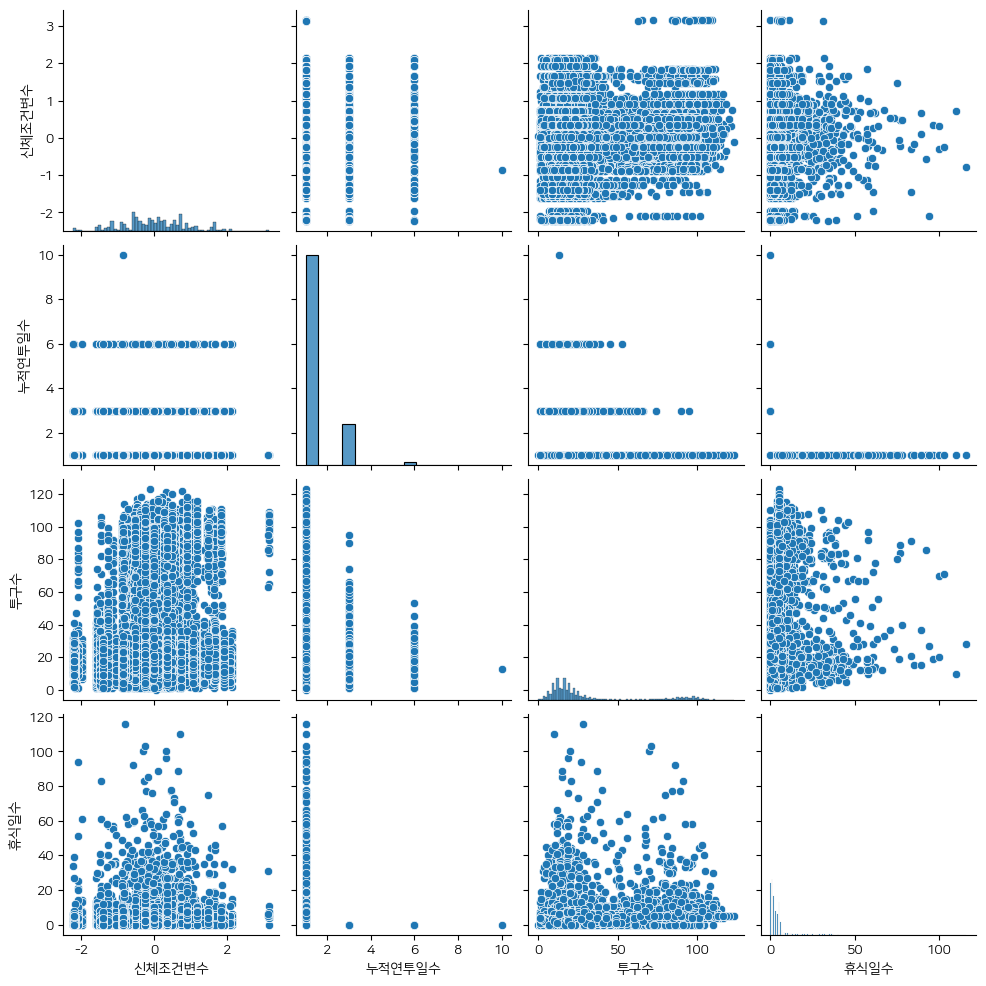

In [28]:
sns.pairplot(fatigue_df, vars=['신체조건변수', '누적연투일수', '투구수', '휴식일수'])
fatigue_df[['신체조건변수', '누적연투일수', '투구수', '휴식일수']].corr()

In [29]:
fatigue_df

,선수,연도,팀,보직,나이,키,몸무게,날짜,구장,온도,...,환경지수_z,외부환경변수,ERA_z,WHIP_z,직구_피안타율_z,선수기량변수,신체조건지수,신체조건_PC1,신체조건_PC2,신체조건변수
0,고영표,2021,KT,SP,34,187,88,2021-04-07,1,16.7,...,-0.732095,-1.212969,-0.305372,-0.433944,-0.347834,-0.380410,0.223718,0.223718,-0.495669,0.519873
1,고영표,2021,KT,SP,34,187,88,2021-04-13,0,10.2,...,-1.747576,-1.959917,-0.069172,-0.258839,-0.347834,-0.204072,0.223718,0.223718,-0.495669,0.519873
2,고영표,2021,KT,SP,34,187,88,2021-04-18,1,13.2,...,-0.883977,-1.413517,-0.187272,-0.433944,-0.347834,-0.340099,0.223718,0.223718,-0.495669,0.519873
3,고영표,2021,KT,SP,34,187,88,2021-04-24,1,22.8,...,-0.186269,-0.508470,-0.069172,0.081070,-0.347834,-0.018271,0.223718,0.223718,-0.495669,0.519873
4,고영표,2021,KT,SP,34,187,88,2021-04-30,1,12.0,...,-0.871273,-1.400480,-0.119561,-0.274290,-0.347834,-0.229717,0.223718,0.223718,-0.495669,0.519873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,후라도,2024,키움,SP,29,188,109,2024-08-25,1,25.5,...,0.627052,0.525287,-0.221127,-0.639949,0.222443,-0.400362,2.412543,2.412543,-0.205189,1.173824
17524,후라도,2024,키움,SP,29,188,109,2024-09-03,0,28.0,...,0.165115,0.499845,0.032394,0.132571,0.222443,0.108448,2.412543,2.412543,-0.205189,1.173824
17525,후라도,2024,키움,SP,29,188,109,2024-09-08,0,32.0,...,0.447546,0.866492,-0.133733,-0.372142,0.222443,-0.224143,2.412543,2.412543,-0.205189,1.173824
17526,후라도,2024,키움,SP,29,188,109,2024-09-14,0,33.4,...,0.613076,1.079015,-0.321906,-0.346391,0.222443,-0.274296,2.412543,2.412543,-0.205189,1.173824


In [35]:
fatigue_df['피로도지표'] = fatigue_df['피로도지수'] * 100

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- 투수 A/B 입력 ---
투수_A = {'선수': '김영규', '연도': 2024, '날짜': '2024-07-21', '팀': 'NC'}
투수_B = {'선수': '김재열', '연도': 2024, '날짜': '2024-07-18', '팀': 'NC'}

# --- A/B 행 추출 함수 ---
def get_pitcher_row(df, info):
    row = df[
        (df['선수'] == info['선수']) &
        (df['연도'] == info['연도']) &
        (df['날짜'] == info['날짜']) &
        (df['팀'] == info['팀'])
    ]
    if row.empty:
        raise ValueError(f"❌ 조건에 맞는 등판이 없습니다: {info}")
    return row.iloc[0]

row_A = get_pitcher_row(fatigue_df, 투수_A)
row_B = get_pitcher_row(fatigue_df, 투수_B)

# --- 회귀 학습 (피로도지표 포함) ---
X_raw = fatigue_df[['선수기량변수', '신체조건변수', '외부환경변수', '피로도지표']]
y = fatigue_df['GS']

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_raw)

model = LinearRegression()
model.fit(X_scaled, y)

b0, b1, b2, b3, b4 = model.intercept_, *model.coef_

# --- A/B 입력값 스케일링 ---
a_scaled = standard_scaler.transform([[row_A['선수기량변수'], row_A['신체조건변수'], row_A['외부환경변수'], 0]])[0]
b_scaled = standard_scaler.transform([[row_B['선수기량변수'], row_B['신체조건변수'], row_B['외부환경변수'], row_B['피로도지표']]])[0]

# --- 역전점 계산 (standard 스케일) ---
numerator = b1 * (a_scaled[0] - b_scaled[0]) + b2 * (a_scaled[1] - b_scaled[1]) + b3 * (a_scaled[2] - b_scaled[2])
denominator = b4
역전점_standard = b_scaled[3] - (numerator / denominator)

# --- 스케일 역변환 (standard → 지표) ---
# 피로도지표는 이미 MinMaxScaling 된 값이므로 역전점_standard → 원래 피로도지표 단위로 되돌리기
# 표준화 전의 피로도지표 평균/표준편차로 복원
지표_평균 = fatigue_df['피로도지표'].mean()
지표_표준편차 = fatigue_df['피로도지표'].std()
역전점_피로도지표 = 역전점_standard * 지표_표준편차 + 지표_평균

# ✅ 최종 출력
if 역전점_피로도지표 < 0:
    print(f"❗ {투수_A['선수']}은(는) 아무리 피로해져도 {투수_B['선수']}보다 성능이 낮아지지 않습니다.")
else:
    print(f"✅ 역전점 (피로도지표 기준): {투수_A['선수']}이(가) 피로도지표 {역전점_피로도지표:.1f} 이상일 때 {투수_B['선수']}보다 성능이 낮아집니다.")


✅ 역전점 (피로도지표 기준): 김영규이(가) 피로도지표 41.2 이상일 때 김재열보다 성능이 낮아집니다.


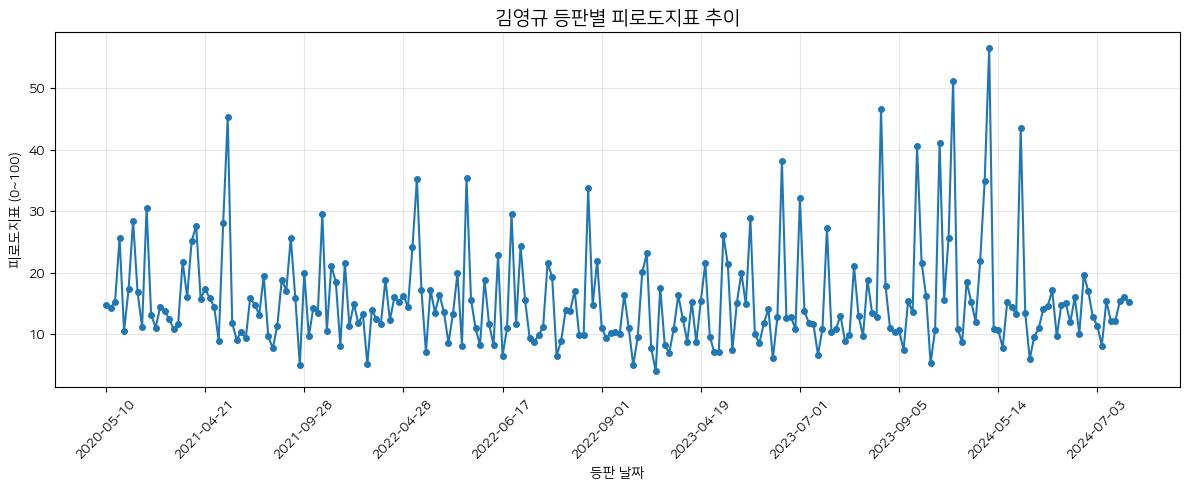

In [53]:
import matplotlib.pyplot as plt

# 정렬
df_김영규 = fatigue_df[fatigue_df['선수'] == '김영규'].copy()
df_김영규 = df_김영규.sort_values(by='날짜').reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(df_김영규['날짜'], df_김영규['피로도지표'], marker='o', markersize=4, linewidth=1.5)

# x축 날짜 라벨 간격 줄이기
step = max(len(df_김영규) // 10, 1)  # 10개 정도만 표시
plt.xticks(df_김영규['날짜'][::step], rotation=45)

plt.title('김영규 등판별 피로도지표 추이', fontsize=14)
plt.xlabel('등판 날짜')
plt.ylabel('피로도지표 (0~100)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

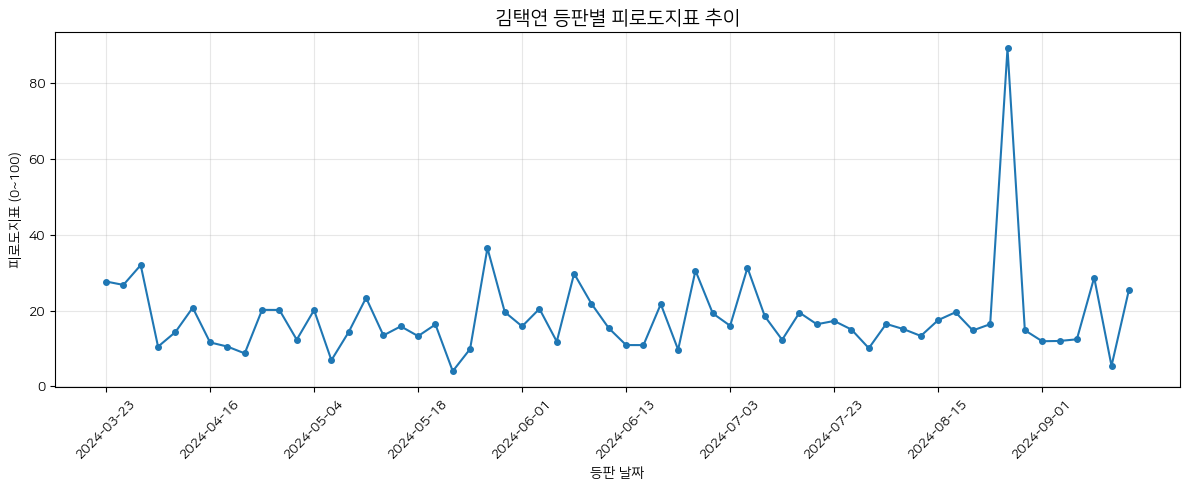

In [54]:
import matplotlib.pyplot as plt

# 김택연 데이터 추출 및 정렬
df_김택연 = fatigue_df[fatigue_df['선수'] == '김택연'].copy()
df_김택연 = df_김택연.sort_values(by='날짜').reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(df_김택연['날짜'], df_김택연['피로도지표'], marker='o', markersize=4, linewidth=1.5)

# x축 날짜 라벨 간격 줄이기
step = max(len(df_김택연) // 10, 1)  # 10개 정도만 표시
plt.xticks(df_김택연['날짜'][::step], rotation=45)

plt.title('김택연 등판별 피로도지표 추이', fontsize=14)
plt.xlabel('등판 날짜')
plt.ylabel('피로도지표 (0~100)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


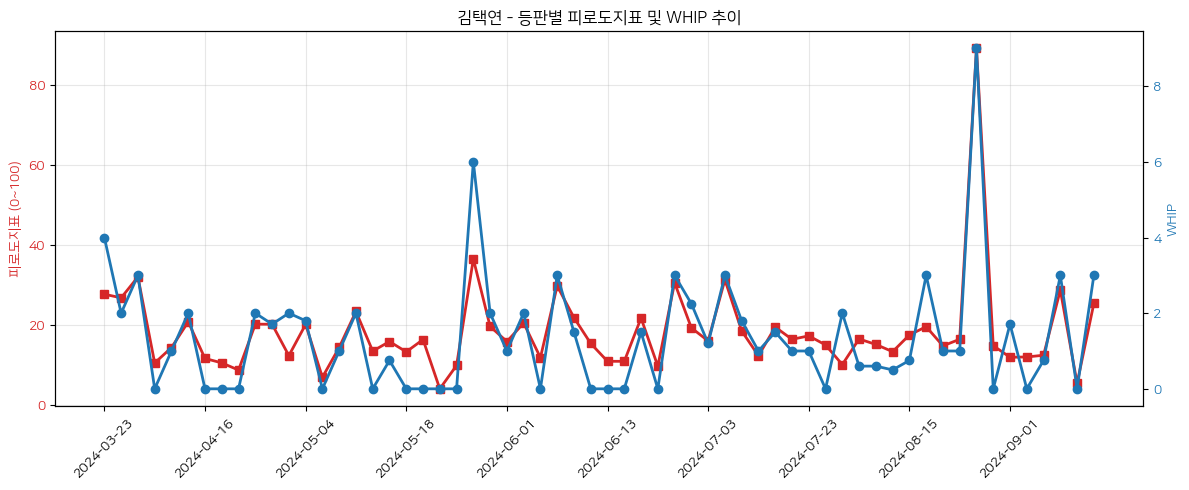

In [58]:
import matplotlib.pyplot as plt

# 김택연 데이터 정렬
df_김택연 = fatigue_df[fatigue_df['선수'] == '김택연'].copy()
df_김택연 = df_김택연.sort_values(by='날짜').reset_index(drop=True)

# 날짜
x = df_김택연['날짜']

# --- 그래프 시작 ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Y축 1: 피로도지표 (0~100)
ax1.plot(x, df_김택연['피로도지표'], color='tab:red', marker='s', label='피로도지표', linewidth=2)
ax1.set_ylabel('피로도지표 (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Y축 2: WHIP
ax2 = ax1.twinx()
ax2.plot(x, df_김택연['WHIP'], color='tab:blue', marker='o', label='WHIP', linewidth=2)
ax2.set_ylabel('WHIP', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# X축 설정
step = max(len(x) // 10, 1)
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

# 제목 및 스타일
plt.title('김택연 - 등판별 피로도지표 및 WHIP 추이')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


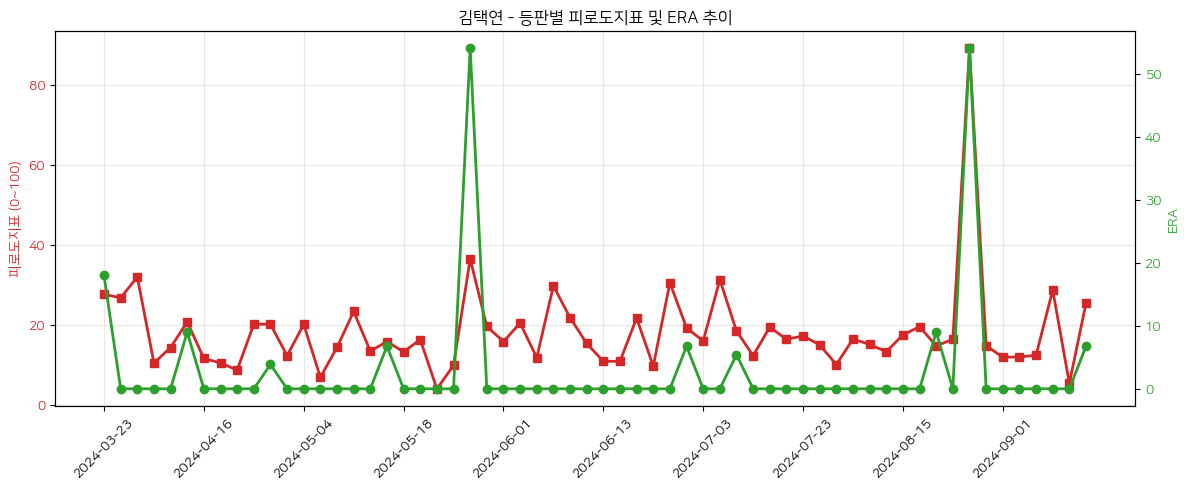

In [59]:
# ERA & 피로도지표
fig, ax1 = plt.subplots(figsize=(12, 5))

# Y1: 피로도지표
ax1.plot(x, df_김택연['피로도지표'], color='tab:red', marker='s', label='피로도지표', linewidth=2)
ax1.set_ylabel('피로도지표 (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Y2: ERA
ax2 = ax1.twinx()
ax2.plot(x, df_김택연['ERA'], color='tab:green', marker='o', label='ERA', linewidth=2)
ax2.set_ylabel('ERA', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# X축 설정
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

plt.title('김택연 - 등판별 피로도지표 및 ERA 추이')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


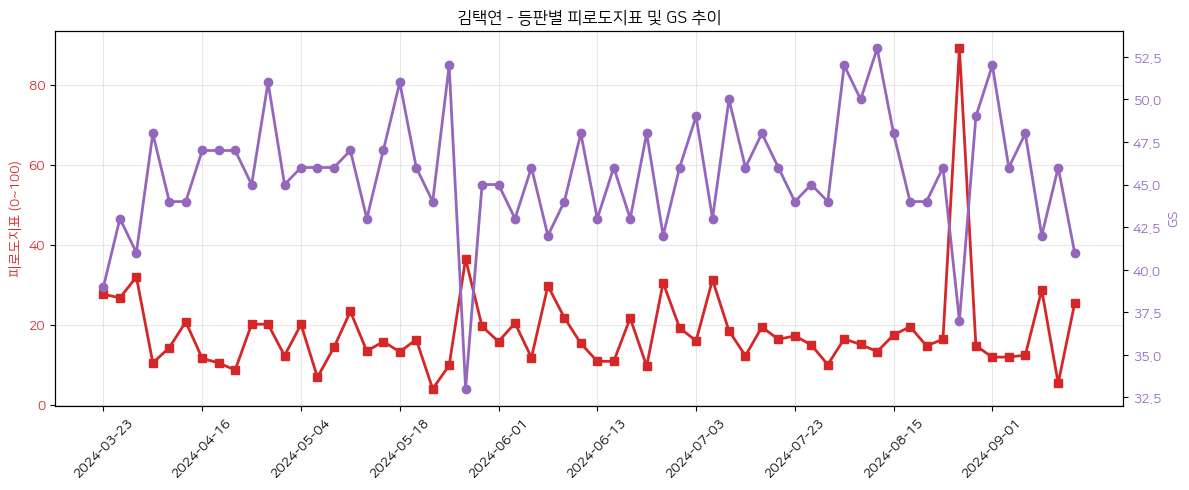

In [60]:
# GS & 피로도지표
fig, ax1 = plt.subplots(figsize=(12, 5))

# Y1: 피로도지표
ax1.plot(x, df_김택연['피로도지표'], color='tab:red', marker='s', label='피로도지표', linewidth=2)
ax1.set_ylabel('피로도지표 (0~100)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Y2: GS
ax2 = ax1.twinx()
ax2.plot(x, df_김택연['GS'], color='tab:purple', marker='o', label='GS', linewidth=2)
ax2.set_ylabel('GS', color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# X축 설정
ax1.set_xticks(x[::step])
ax1.set_xticklabels(x[::step], rotation=45)

plt.title('김택연 - 등판별 피로도지표 및 GS 추이')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

In [56]:
# 김택연 데이터 필터링
df_김택연 = fatigue_df[fatigue_df['선수'] == '김택연'].copy()

# 피로도지표 최대값 행 추출
row_max = df_김택연.loc[df_김택연['피로도지표'].idxmax()]

# 결과 출력
print(f"📌 김택연 피로도지표 최고치 등판일:")
print(f"- 날짜: {row_max['날짜']}")
print(f"- 피로도지표: {row_max['피로도지표']:.1f}")
print(f"- ERA: {row_max['ERA']:.2f}, WHIP: {row_max['WHIP']:.2f}")


📌 김택연 피로도지표 최고치 등판일:
- 날짜: 2024-08-24
- 피로도지표: 89.1
- ERA: 54.00, WHIP: 9.00


In [45]:
print(f"b1 (기량): {b1}")
print(f"b2 (신체): {b2}")
print(f"b3 (환경): {b3}")
print(f"b4 (피로도): {b4}")

b1 (기량): 1.54587207930947
b2 (신체): 0.0031874066066522877
b3 (환경): -0.005556853445982466
b4 (피로도): 0.39501185063535693


In [38]:
fatigue_df['피로도지수']

0        0.130131
1        0.140647
2        0.131611
3        0.124705
4        0.119807
           ...   
17523    0.124512
17524    0.194011
17525    0.111868
17526    0.110953
17527    0.126659
Name: 피로도지수, Length: 17528, dtype: float64